<a href="https://colab.research.google.com/github/takumi0706/IntroductionMLByPython/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install chainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chainer: filename=chainer-7.8.1-py3-none-any.whl size=967716 sha256=95de8867e87a8f21c5b99c924ef1418754a71a7c8ed6e8b84587d7105a771330
  Stored in directory: /root/.cache/pip/wheels/c4/95/6a/16014db6f761c4e742755b64aac60dbe142da1df6c5919f790
Successfully built chainer


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds

In [4]:
Iris = ds.load_iris()
xdata = Iris.data.astype(np.float32)
tdata = Iris.target.astype(np.int32)

In [5]:
D,N = xdata.shape

In [6]:
Dtrain = D//2
# permutation == ランダムにD=150の数字をランダムに並び替える
index = np.random.permutation(range(D))
xtrain = xdata[index[0:Dtrain],:]
ttrain = tdata[index[0:Dtrain]]
xtest = xdata[index[Dtrain:D],:]
ttest = tdata[index[Dtrain:D]]

In [7]:
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable,Chain,config

In [8]:
# 最大値抽出
C = np.max(tdata)+1
NN = Chain(l1 = L.Linear(N,3),l2 = L.Linear(3,3), l3 = L.Linear(3,C))

In [9]:
def model(x):
  h = NN.l1(x)
  h = F.relu(h)
  h = NN.l2(h)
  h = F.relu(h)
  y = NN.l3(h)
  return y

In [22]:
# 最適化の設定
optNN = Opt.Adam()
optNN.setup(NN)

In [23]:
# 記録保存
train_loss = []
train_acc = []
test_loss = []
test_acc = []

In [24]:
T = 10000
for time in range(T):
  config.train = True
  optNN.target.zerograds()
  ytrain = model(xtrain)
  loss_train = F.softmax_cross_entropy(ytrain,ttrain)
  acc_train = F.accuracy(ytrain,ttrain)
  loss_train.backward()
  optNN.update()
  config.train = False
  ytest = model(xtest)
  loss_test = F.softmax_cross_entropy(ytest,ttest)
  acc_test = F.accuracy(ytest,ttest)
  train_loss.append(loss_train.data)
  train_acc.append(acc_train.data)
  test_loss.append(loss_test.data)
  test_acc.append(acc_test.data)

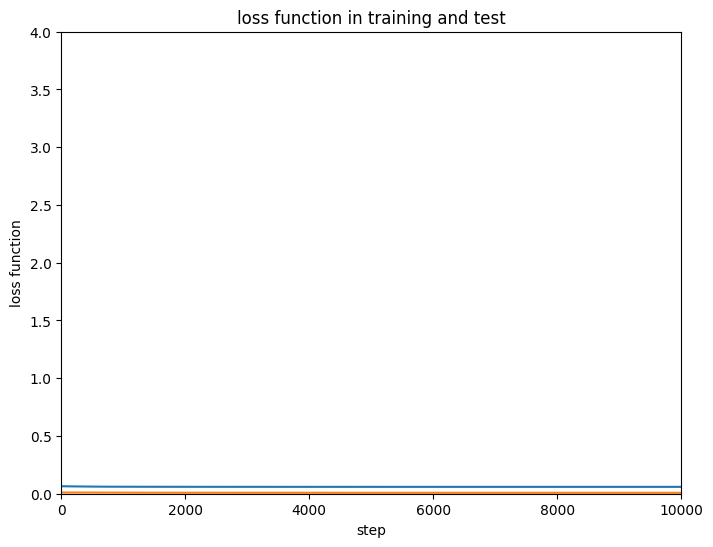

In [25]:
Tall = len(train_loss)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),train_loss)
plt.plot(range(Tall),test_loss)
plt.title("loss function in training and test")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0,Tall])
plt.ylim([0,4])
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

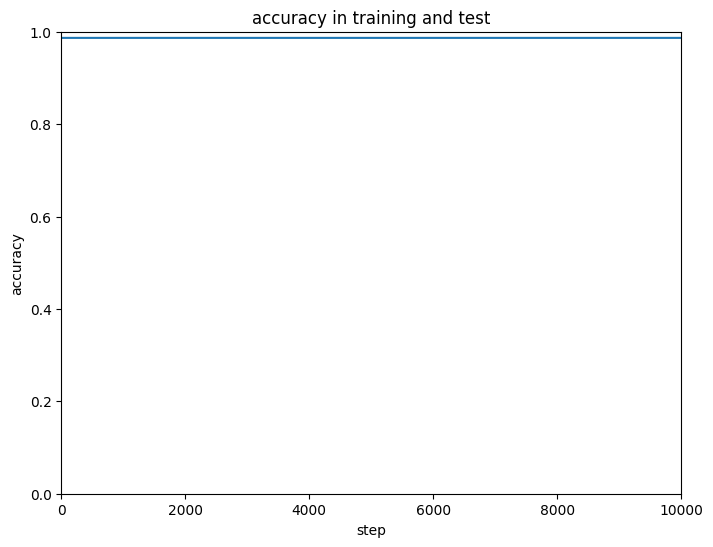

In [26]:
plt.figure(figsize = (8,6))
plt.plot(range(Tall),train_acc)
plt.plot(range(Tall),test_acc)
plt.title("accuracy in training and test")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0,Tall])
plt.ylim([0,1.0])
plt.show